# Imports

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.regularizers import l1, l2, l1_l2

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

import optuna

import numpy as np
import pandas as pd
import seaborn as sns

# Load Data

In [80]:
df = pd.read_csv(r'C:\Users\casey\OneDrive\Documents\Data_Science\pandas_exercises\data\Customer_Churn_Modelling.csv', sep=',')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# EDA

* Look for relvant columns
* Explore columns for missing values, values that don't make sense

Get rows and columns

In [5]:
print('There are ', df.shape[0], ' rows.')
print('There are ', df.shape[1], ' columns.')
print('Column Names: ', df.columns)
print('Column Types: ', df.dtypes)

There are  10000  rows.
There are  14  columns.
Column Names:  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
Column Types:  RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Check for any missing values in relevant columns

In [6]:
## CHECK FOR MISSING VALUES
# age, embarked, embarked_town, deck have missing values, will have to deal with them
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check relevant columns for values that don't make sense

In [8]:
df.CreditScore.sort_values().unique()

array([350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395,
       399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 57

In [9]:
df.Age.sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

In [10]:
df.Tenure.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

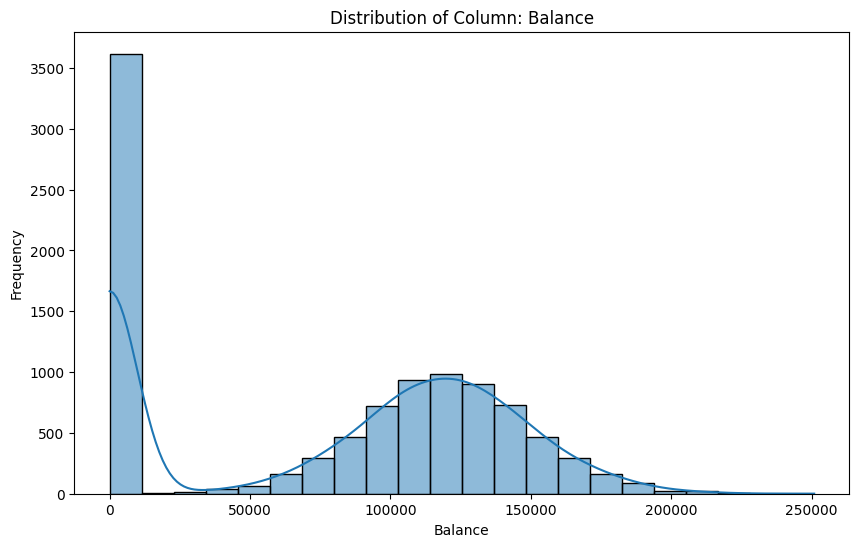

In [12]:
# Plot distribution of a specific column (e.g., 'age')
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True)
plt.title('Distribution of Column: Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

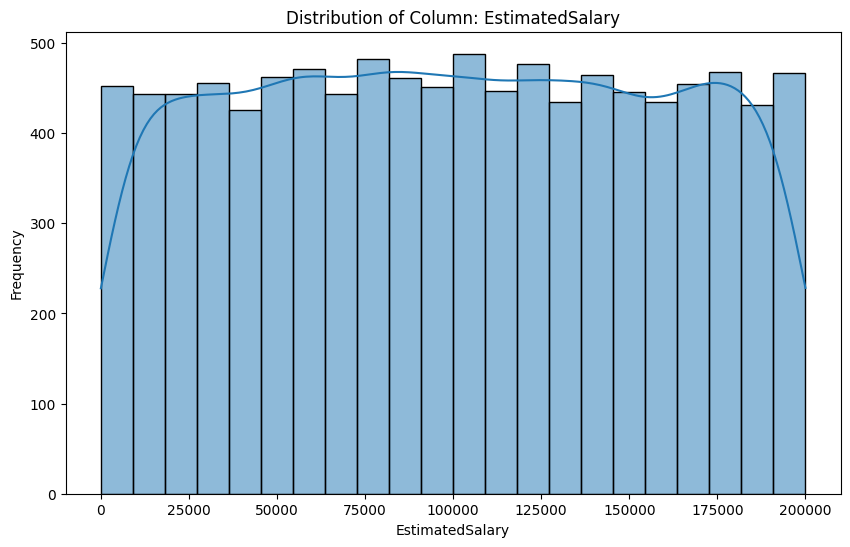

In [14]:
# Plot distribution of a specific column (e.g., 'age')
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], kde=True)
plt.title('Distribution of Column: EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

In [15]:
print(df.Geography.value_counts())
print(df.Gender.value_counts())
print(df.NumOfProducts.value_counts())
print(df.HasCrCard.value_counts())
print(df.IsActiveMember.value_counts())
print(df.Exited.value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


## Label Balance
### If Imbalanced
* Random Undersampling
* Use tree based methods
* Anomaly Detection if only two classes
* Class weights

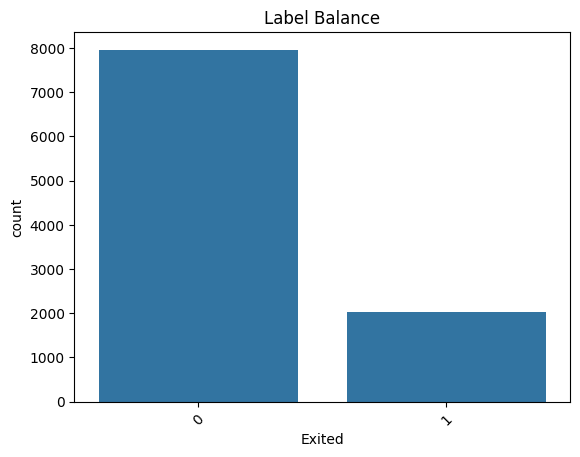

In [16]:
sns.countplot(data=df, x='Exited')
# plt.ylim(0, 26000)
# plt.text(0.65, 13000, str(positive_percent) + '%', size='medium', color='black', weight='semibold')
# plt.text(2.7, 11500, str(negative_percent) + '%', size='medium', color='black', weight='semibold')
# plt.text(3.7, 9000, str(neutral_percent) + '%', size='medium', color='black', weight='semibold')
plt.title('Label Balance')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Label percentages
label_counts = df['Exited'].value_counts()
label_percentages = (label_counts / len(df)) * 100

# Print label counts and percentages
print("Label Counts:")
print(label_counts)
print("\nLabel Percentages (%):")
print(label_percentages)

Label Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Label Percentages (%):
Exited
0    79.63
1    20.37
Name: count, dtype: float64


# Pre-Processing

* Encode labels if necessary
* Remove RowNumber, CustomerId, Surname
* One Hot Encoding: Geograpy, Gender
* Train test split
* Random Undersampling if necessary
* Scale data (fit_transform on train, transform on test)
* Convert to tensors

Label Encoding if Necessary

In [ ]:
# label_mapping_int = {
#     "Exited_Yes": 1,
#     "Exited_No": 0,
# }

# df['Exited'] = df['Exited'].map(label_mapping_int).fillna(df['Exited'])

# print('\nAfter Mapping')
# print(df.info())
# print(df.Exited.value_counts())

Drop Unnecessary Columns and Select predictors and label columns

In [81]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

In [23]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

One Hot Encoding

In [82]:
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender'], dtype=int)
X_encoded.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        101348.88                 1                  0   
1               1        112542.58                 0                  0   
2               0        113931.57                 1                  0   
3               0         93826.63                 1                  0   
4               1         79084.10                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1                1              1            0  
2                0              1            0  
3                0              1            0  
4                1              1            0

Train_test_split
* If there is label imbalance ensure stratify is used

In [83]:
twenty_percent_size = round(len(X_encoded) * 0.2)
print(twenty_percent_size)

2000


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=twenty_percent_size, stratify=y)

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=twenty_percent_size, stratify=y_train)

In [86]:
# Print percentage of each label in the training set
train_label_counts = np.bincount(y_train)
train_label_percentages = train_label_counts / len(y_train) * 100

print("Training Set Label Percentages:")
for label, percentage in enumerate(train_label_percentages):
    print(f"Label {label}: {percentage:.2f}%")

print("\nTraining Set Label Value Counts:")
print(y_train.value_counts())

# Print percentage of each label in the testing set
test_label_counts = np.bincount(y_test)
test_label_percentages = test_label_counts / len(y_test) * 100

print("\nTesting Set Label Percentages:")
for label, percentage in enumerate(test_label_percentages):
    print(f"Label {label}: {percentage:.2f}%")

print("\nTesting Set Label Value Counts:")
print(y_test.value_counts())

# Print percentage of each label in the validation set
val_label_counts = np.bincount(y_val)
val_label_percentages = test_label_counts / len(y_val) * 100

print("\nValidation Set Label Percentages:")
for label, percentage in enumerate(val_label_percentages):
    print(f"Label {label}: {percentage:.2f}%")

print("\nValidation Set Label Value Counts:")
print(y_val.value_counts())

Training Set Label Percentages:
Label 0: 79.63%
Label 1: 20.37%

Training Set Label Value Counts:
Exited
0    4778
1    1222
Name: count, dtype: int64

Testing Set Label Percentages:
Label 0: 79.65%
Label 1: 20.35%

Testing Set Label Value Counts:
Exited
0    1593
1     407
Name: count, dtype: int64

Validation Set Label Percentages:
Label 0: 79.65%
Label 1: 20.35%

Validation Set Label Value Counts:
Exited
0    1592
1     408
Name: count, dtype: int64


Random Undersampling if Necessary

In [87]:
train_df = X_train.copy()
train_df['train_labels'] = y_train

X = train_df.drop(columns=['train_labels'], axis=1) # Features
y = train_df['train_labels']  # Target/Labels

# Before undersampling
print('Original dataset class distribution:', Counter(y))

# Create the RandomUnderSampler object
rus = RandomUnderSampler(random_state=42) # can specify ratio you want as well

# Perform undersampling
X_res, y_res = rus.fit_resample(X, y)

# After undersampling
print('Resampled dataset class distribution:', Counter(y_res))
# Print percentage of each label in the testing set
test_label_counts = np.bincount(y_test)
test_label_percentages = test_label_counts / len(y_test) * 100

print("\nTesting Set Label Percentages:")
for label, percentage in enumerate(test_label_percentages):
    print(f"Label {label}: {percentage:.2f}%")

# Convert the resampled dataset back to DataFrame if needed
train_df_resampled = pd.DataFrame(X_res, columns=X.columns)
train_df_resampled['train_labels'] = y_res
print(train_df_resampled)

X_train = train_df_resampled.drop(columns=['train_labels'], axis=1) # Features
y_train = train_df_resampled['train_labels']

Original dataset class distribution: Counter({0: 4778, 1: 1222})
Resampled dataset class distribution: Counter({0: 1222, 1: 1222})

Testing Set Label Percentages:
Label 0: 79.65%
Label 1: 20.35%
      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
713           501   41       3  144260.50              1          1   
1989          695   28       0   96020.86              1          1   
2475          627   32      10       0.00              2          1   
3121          634   27       3  107027.52              1          1   
5334          786   24       2  120135.55              2          1   
...           ...  ...     ...        ...            ...        ...   
3556          590   60       6  147751.75              1          1   
7310          627   41       6       0.00              3          1   
1676          812   44       8       0.00              3          1   
4756          785   39       1  130147.98              1          1   
5571          684   38  

Scale Data

In [91]:
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

c:\Users\casey\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\casey\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Convert to tensors

In [59]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
X_val = tf.convert_to_tensor(X_val)
y_train = tf.convert_to_tensor(y_train) 
y_test = tf.convert_to_tensor(y_test)
y_val = tf.convert_to_tensor(y_val)

# Modeling

## ANN

In [71]:
ANN_Model = tf.keras.models.Sequential([
  # tf.keras.layers.Dense(32, activation='sigmoid'), 
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dense(8, activation='relu'),
  #tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(1, activation='sigmoid'), 
])

ANN_Model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=["accuracy"])


Hist=ANN_Model.fit(X_train,y_train, epochs=50, validation_data=(X_val, y_val))

## Save the Model
# ANN_Model.save("ANN_Model")
ANN_Model.summary()

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7942 - loss: 0.5027 - val_accuracy: 0.8005 - val_loss: 0.4654
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.4489 - val_accuracy: 0.8080 - val_loss: 0.4509
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 0.4349 - val_accuracy: 0.8115 - val_loss: 0.4405
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.4157 - val_accuracy: 0.8145 - val_loss: 0.4333
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4126 - val_accuracy: 0.8140 - val_loss: 0.4304
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.4248 - val_accuracy: 0.8120 - val_loss: 0.4238
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8224 - loss: 0.4049 - val_accuracy: 0.8190 - val_loss: 0.4143
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8315 - loss: 0.3962 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,765 (22.52 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,844 (15.02 KB)

If Underfitting, increase complexity
* Add layers
* Add units in layers
* Switch activation functions if it seems like vanishing/exploding gradient

If Overfitting, decrease complexity
* Remove layers
* Reduce units in layers
* Add dropout layers
* Add regularization

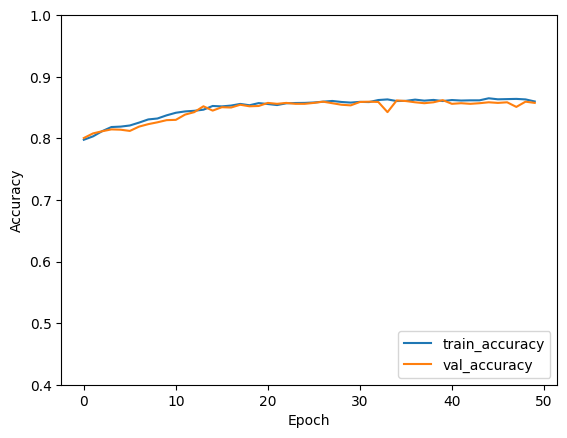

In [72]:
# train accuracy and val accuracy 
plt.plot(Hist.history['accuracy'], label='train_accuracy')
plt.plot(Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')

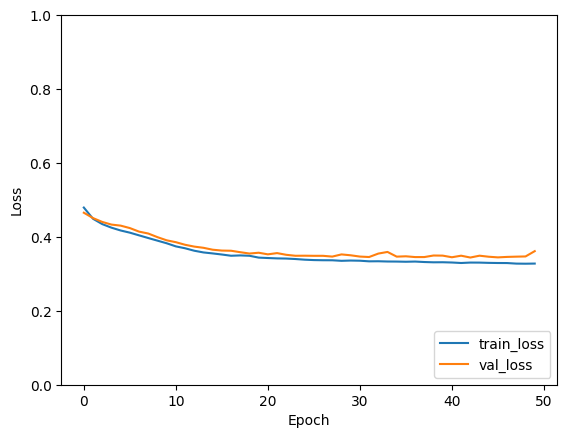

In [73]:
# train loss and val loss
plt.plot(Hist.history['loss'], label='train_loss')
plt.plot(Hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

## Get Accuracy on Test Set

* Check performance on individual labels if there is a label imbalance, add class weights if necessary, or random undersampling

In [75]:
# Make predictions on the test set
y_pred_prob = ANN_Model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary class labels

# Print predictions
print("Predicted labels on the test set:")
print(y_pred)

# Evaluate predictions
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted labels on the test set:
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1593
           1       0.87      0.36      0.51       407

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.72      2000
weighted avg       0.86      0.86      0.84      2000



[[1571   22]
 [ 259  148]]


Text(0.5, 1.0, 'Confusion Matrix: Customer Churn (ANN)')

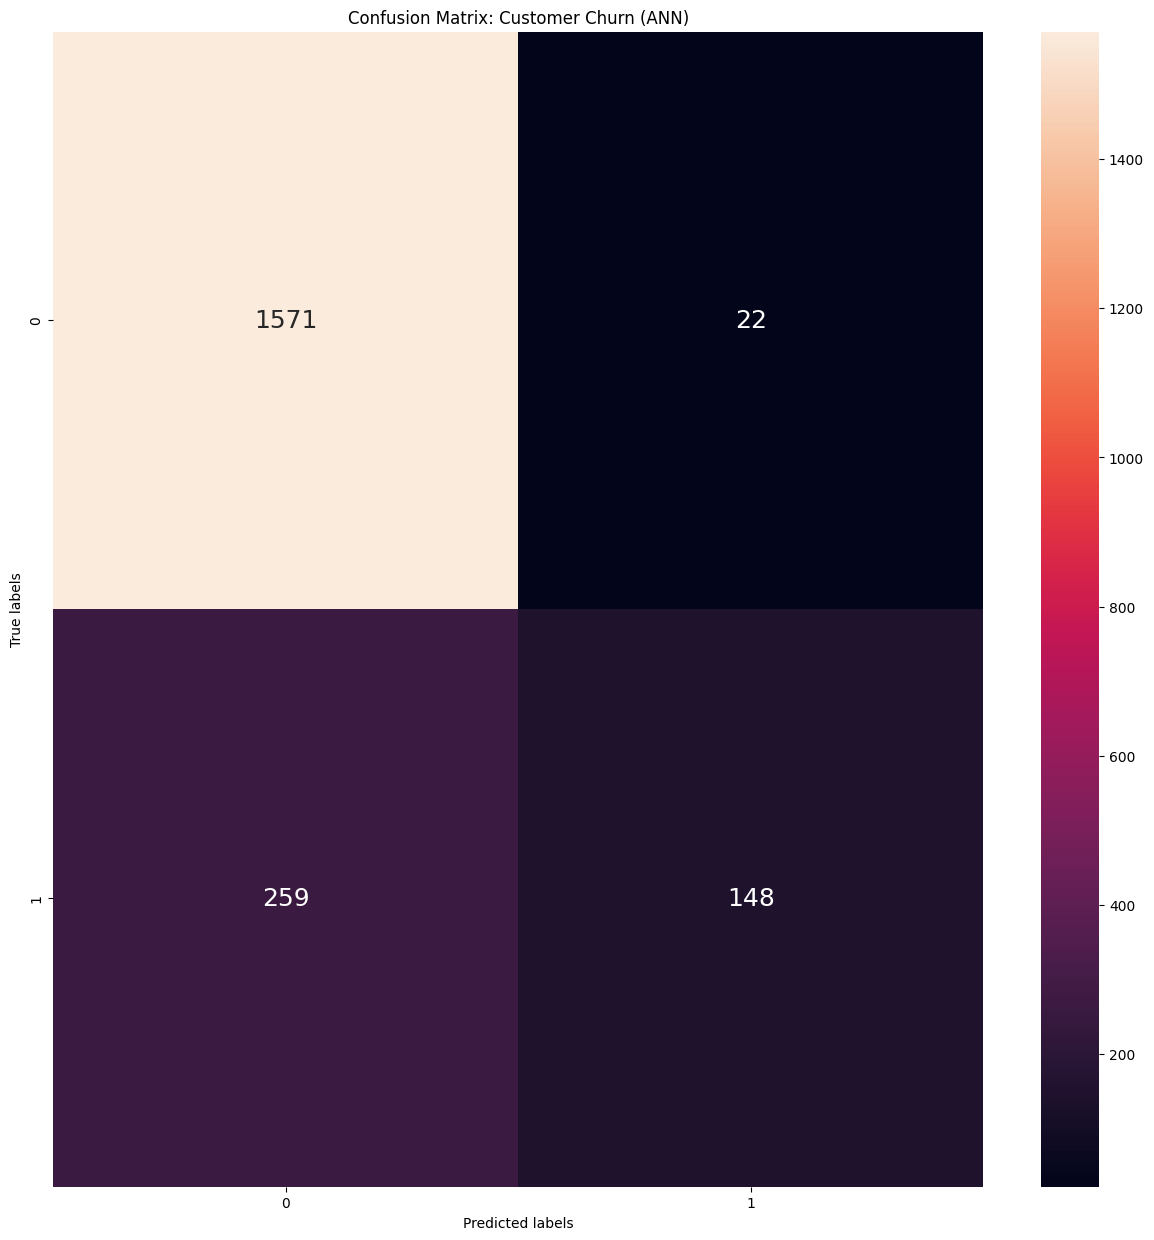

In [76]:
CM=confusion_matrix(y_pred=y_pred, y_true=y_test)
print(CM)

## PLOT A PRETTY CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt     

# # 0: Positive, 1: Negative, 2: Neutral
# class_names = ["Positive","Negative","Neutral"]

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(CM, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix: Customer Churn (ANN)') 
# ax.xaxis.set_ticklabels(["0: Survived","1: Not Survived"],rotation=90, fontsize = 18)

# ax.yaxis.set_ticklabels(["0: Survived","1: Not Survived"],rotation=0, fontsize = 18)